### Is sequentialness preserved across a half-half split of the data?


In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.belief_partitions.belief_partition_configs import *
import scripts.pseudo_decoding.belief_partitions.belief_partitions_io as belief_partitions_io

import scipy
import argparse
import copy

## SA

### Load data, make sure decoder still decodes

Warning, shuffle not found: MAGENTA_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_6
Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9
['CIRCLE' 'SQUARE' 'STAR' 'TRIANGLE' 'CYAN' 'GREEN' 'MAGENTA' 'YELLOW'
 'ESCHER' 'POLKADOT' 'RIPPLE' 'SWIRL']
Warning, shuffle not found: MAGENTA_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_6
Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9


{'amygdala (Amy)': 580        2018092423
 449        2018090725
 241        2018081018
 34         2018070501
 57         2018070534
 295        2018082016
 339        2018082816
 430        2018090702
 695        2018100820
 531        2018091926
 614        2018092622
 296        2018082017
 327        2018082219
 314        2018082118
 547        2018092017
 148        2018080238
 719    20180725000105
 313        2018082117
 448        2018090724
 123        2018080208
 600        2018092527
 426        2018090632
 682        2018100516
 294        2018082015
 493        2018091801
 312        2018082116
 363        2018083021
 368        2018090401
 581        2018092424
 462        2018091025
 354        2018082924
 663        2018100318
 423        2018090626
 282        2018081722
 369        2018090402
 639        2018100124
 229        2018080817
 343        2018082820
 723    20180725000135
 405        2018090526
 404        2018090525
 484        2018091205
 447        2018

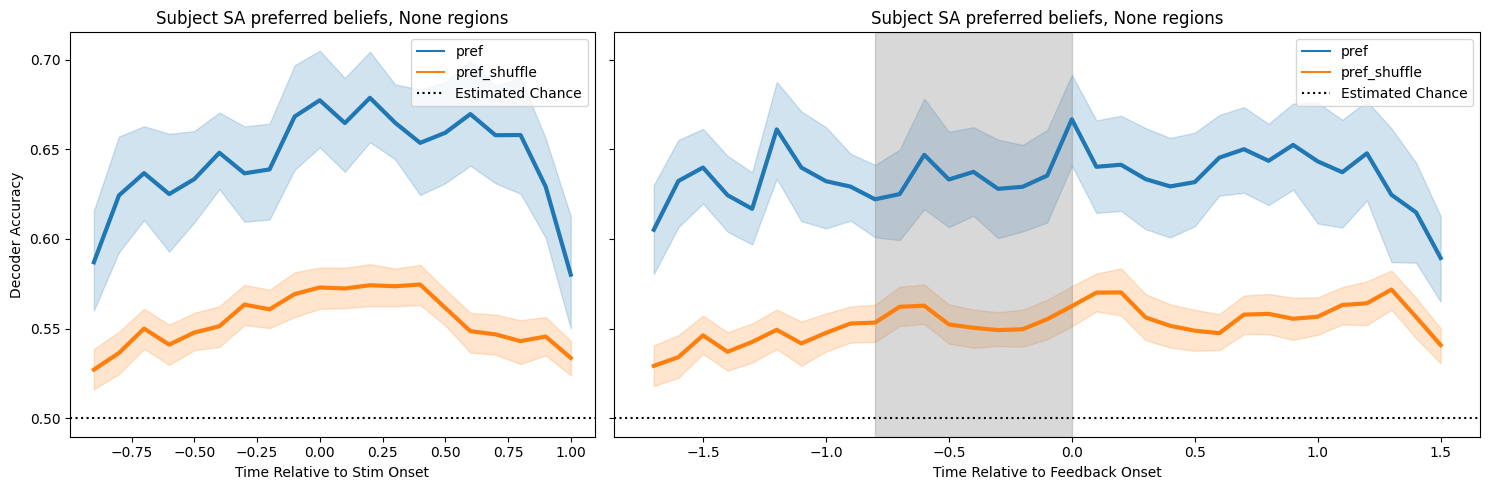

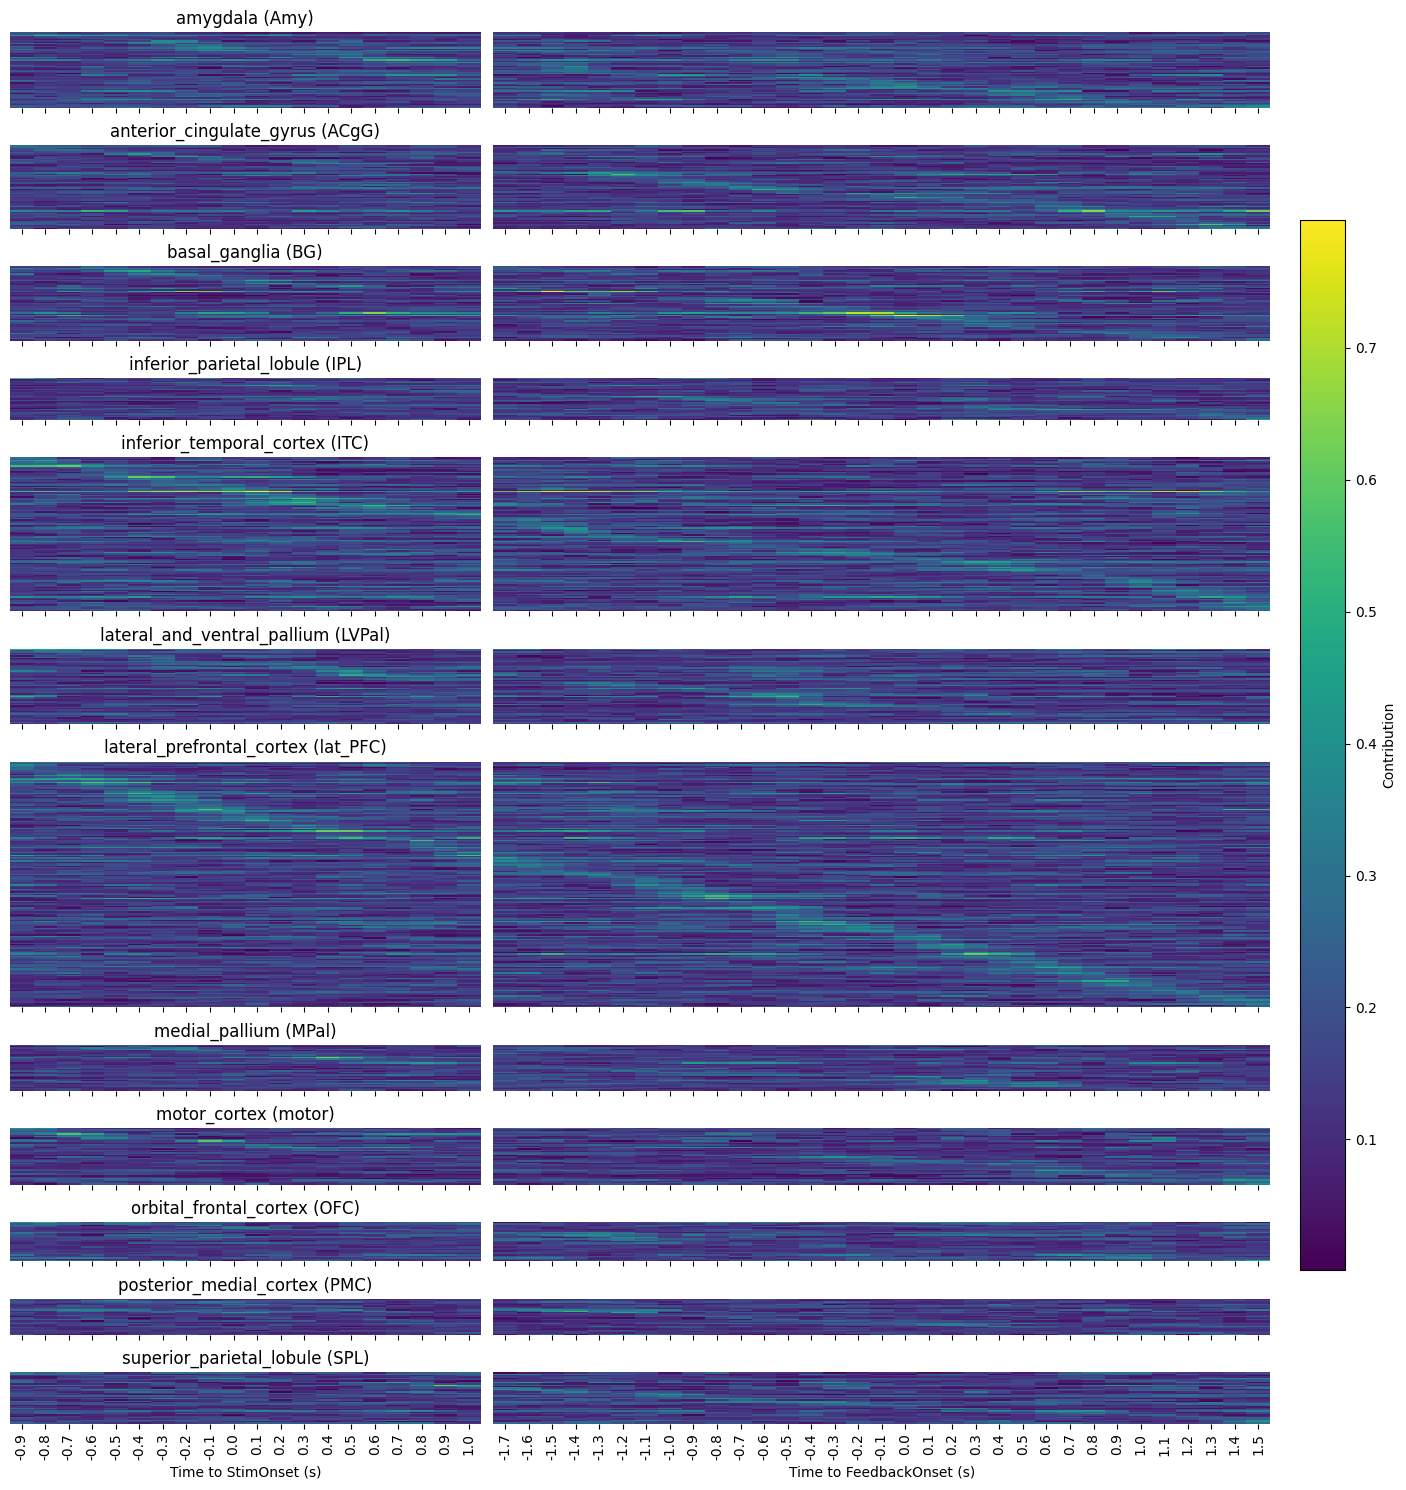

In [11]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.subject = "SA"
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "pref"
args.sig_unit_level = "belief_partition_all_time_95th"
args.splitter = "kfold"
args.num_splits = 2

visualization_utils.plot_combined_accs(args)
visualization_utils.plot_weights(args, region_level="structure_level2")


### Now only load from one run, see whether ordering is preserved on the other run: 

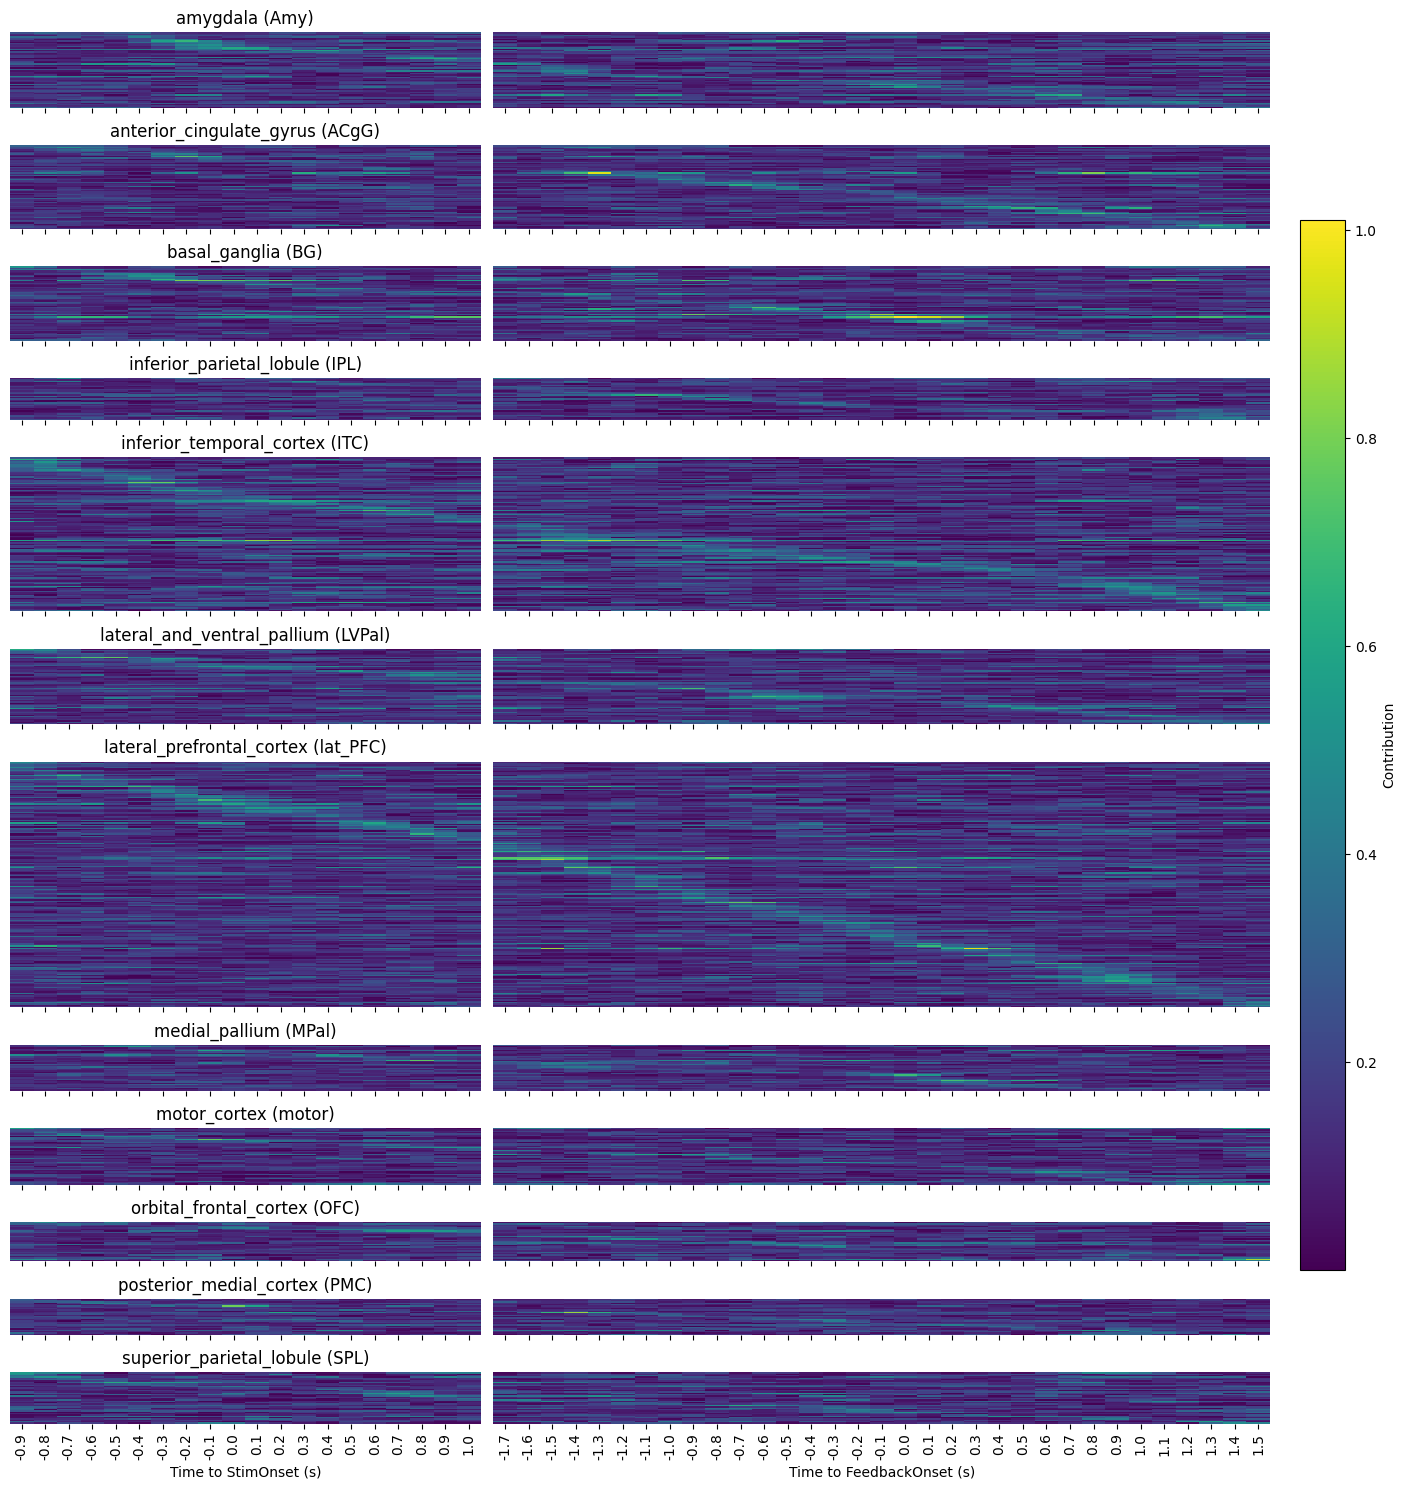

In [12]:
order = visualization_utils.plot_weights(args, region_level="structure_level2", run_idx=0)


{'amygdala (Amy)': 449        2018090725
 34         2018070501
 462        2018091025
 695        2018100820
 580        2018092423
 339        2018082816
 448        2018090724
 430        2018090702
 614        2018092622
 531        2018091926
 327        2018082219
 314        2018082118
 600        2018092527
 719    20180725000105
 547        2018092017
 148        2018080238
 426        2018090632
 229        2018080817
 296        2018082017
 663        2018100318
 369        2018090402
 493        2018091801
 427        2018090634
 190        2018080342
 295        2018082016
 294        2018082015
 329        2018082222
 581        2018092424
 682        2018100516
 368        2018090401
 363        2018083021
 354        2018082924
 241        2018081018
 312        2018082116
 57         2018070534
 282        2018081722
 123        2018080208
 343        2018082820
 639        2018100124
 723    20180725000135
 404        2018090525
 447        2018090723
 405        2018

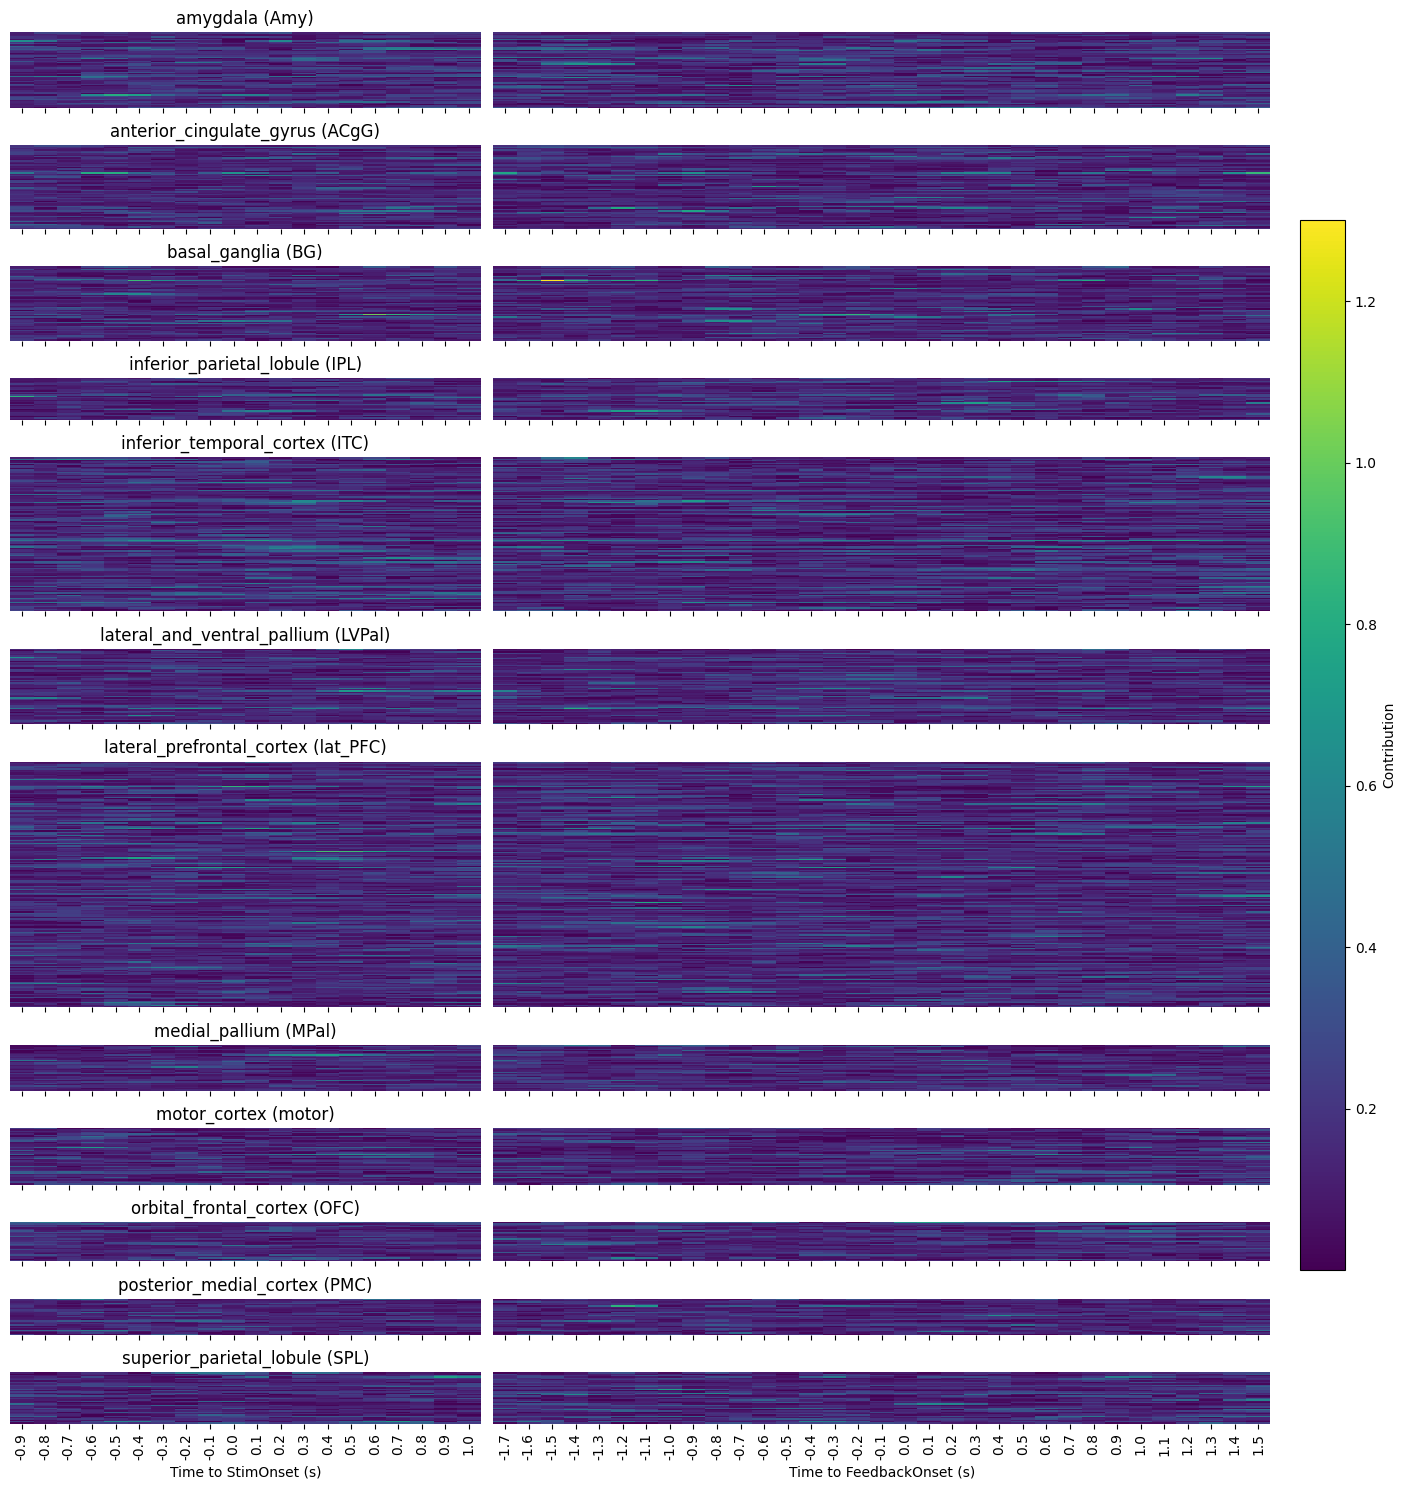

In [13]:
visualization_utils.plot_weights(args, region_level="structure_level2", unit_orders=order, run_idx=1)
# visualization_utils.plot_weights(args, region_level="structure_level2", run_idx=1)


### See if peak times are at least correlated:

In [23]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.subject = "SA"
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "conf"
args.sig_unit_level = "belief_partition_all_time_95th"
args.splitter = "kfold"
args.num_splits = 2

_, _, conts = visualization_utils.get_contributions_for_all_time(args, region_level="whole_pop", sig_region_thresh=20, run_idx=0)
peak_times_run_0 = visualization_utils.find_peaks(conts, "whole_pop")

_, _, conts = visualization_utils.get_contributions_for_all_time(args, region_level="whole_pop", sig_region_thresh=20, run_idx=1)
peak_times_run_1 = visualization_utils.find_peaks(conts, "whole_pop")

In [24]:
peak_times = pd.merge(peak_times_run_0, peak_times_run_1, on=["PseudoUnitID"])

In [25]:
peak_times

,PseudoUnitID,whole_pop_x,peak_time_x,whole_pop_y,peak_time_y
0,2018061501,all_regions,1.1,all_regions,3.4
1,2018061503,all_regions,3.6,all_regions,3.4
2,2018061504,all_regions,0.8,all_regions,-0.3
3,2018061505,all_regions,1.8,all_regions,0.7
4,2018061507,all_regions,4.1,all_regions,1.6
...,...,...,...,...,...
767,20180725000124,all_regions,-0.1,all_regions,0.5
768,20180725000131,all_regions,-0.7,all_regions,2.8
769,20180725000135,all_regions,3.1,all_regions,3.1
770,20180725000136,all_regions,3.9,all_regions,3.3


<Axes: xlabel='peak_time_x', ylabel='peak_time_y'>

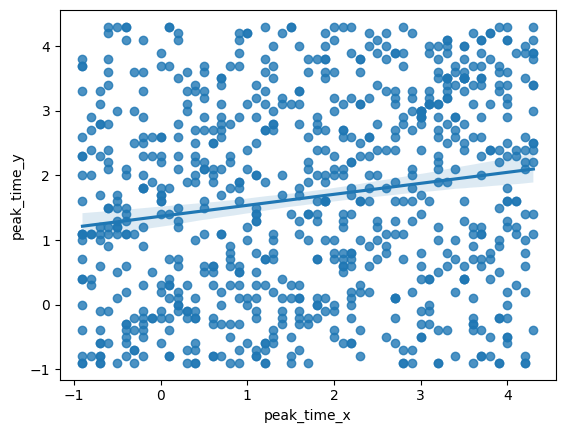

In [26]:
sns.regplot(peak_times, x="peak_time_x", y="peak_time_y")

### Looks like ordering is not preserved across kfold. Is ordering even preserved during random 80/20 splits?

Warning, shuffle not found: MAGENTA_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_6
Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9
['CIRCLE' 'SQUARE' 'STAR' 'TRIANGLE' 'CYAN' 'GREEN' 'MAGENTA' 'YELLOW'
 'ESCHER' 'POLKADOT' 'RIPPLE' 'SWIRL']
Warning, shuffle not found: MAGENTA_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_6
Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9


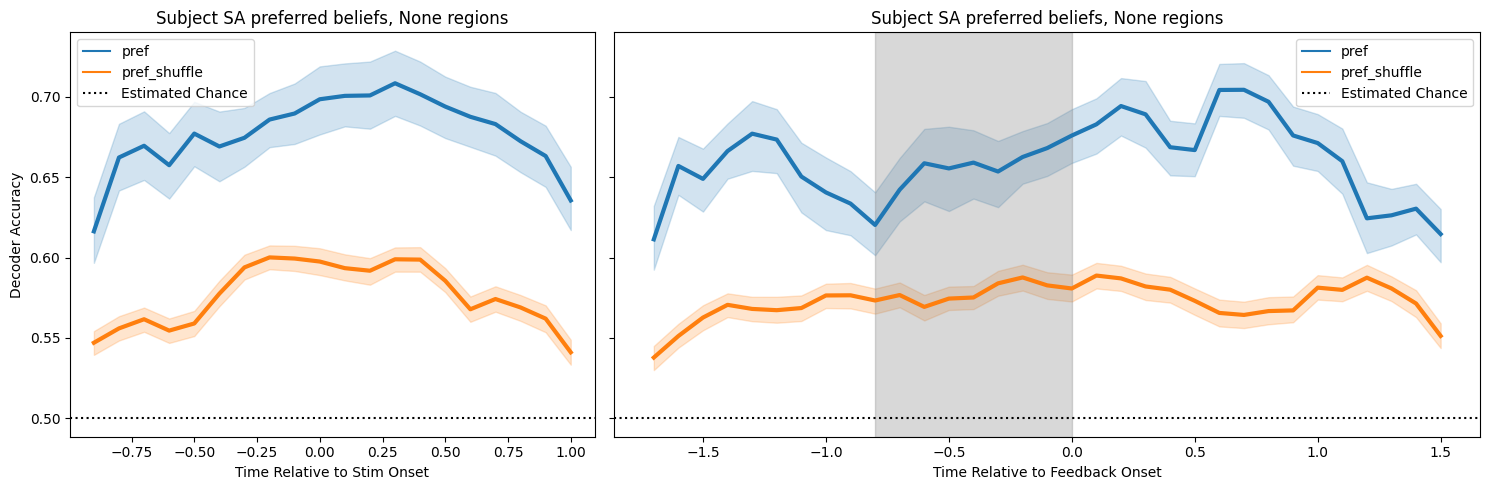

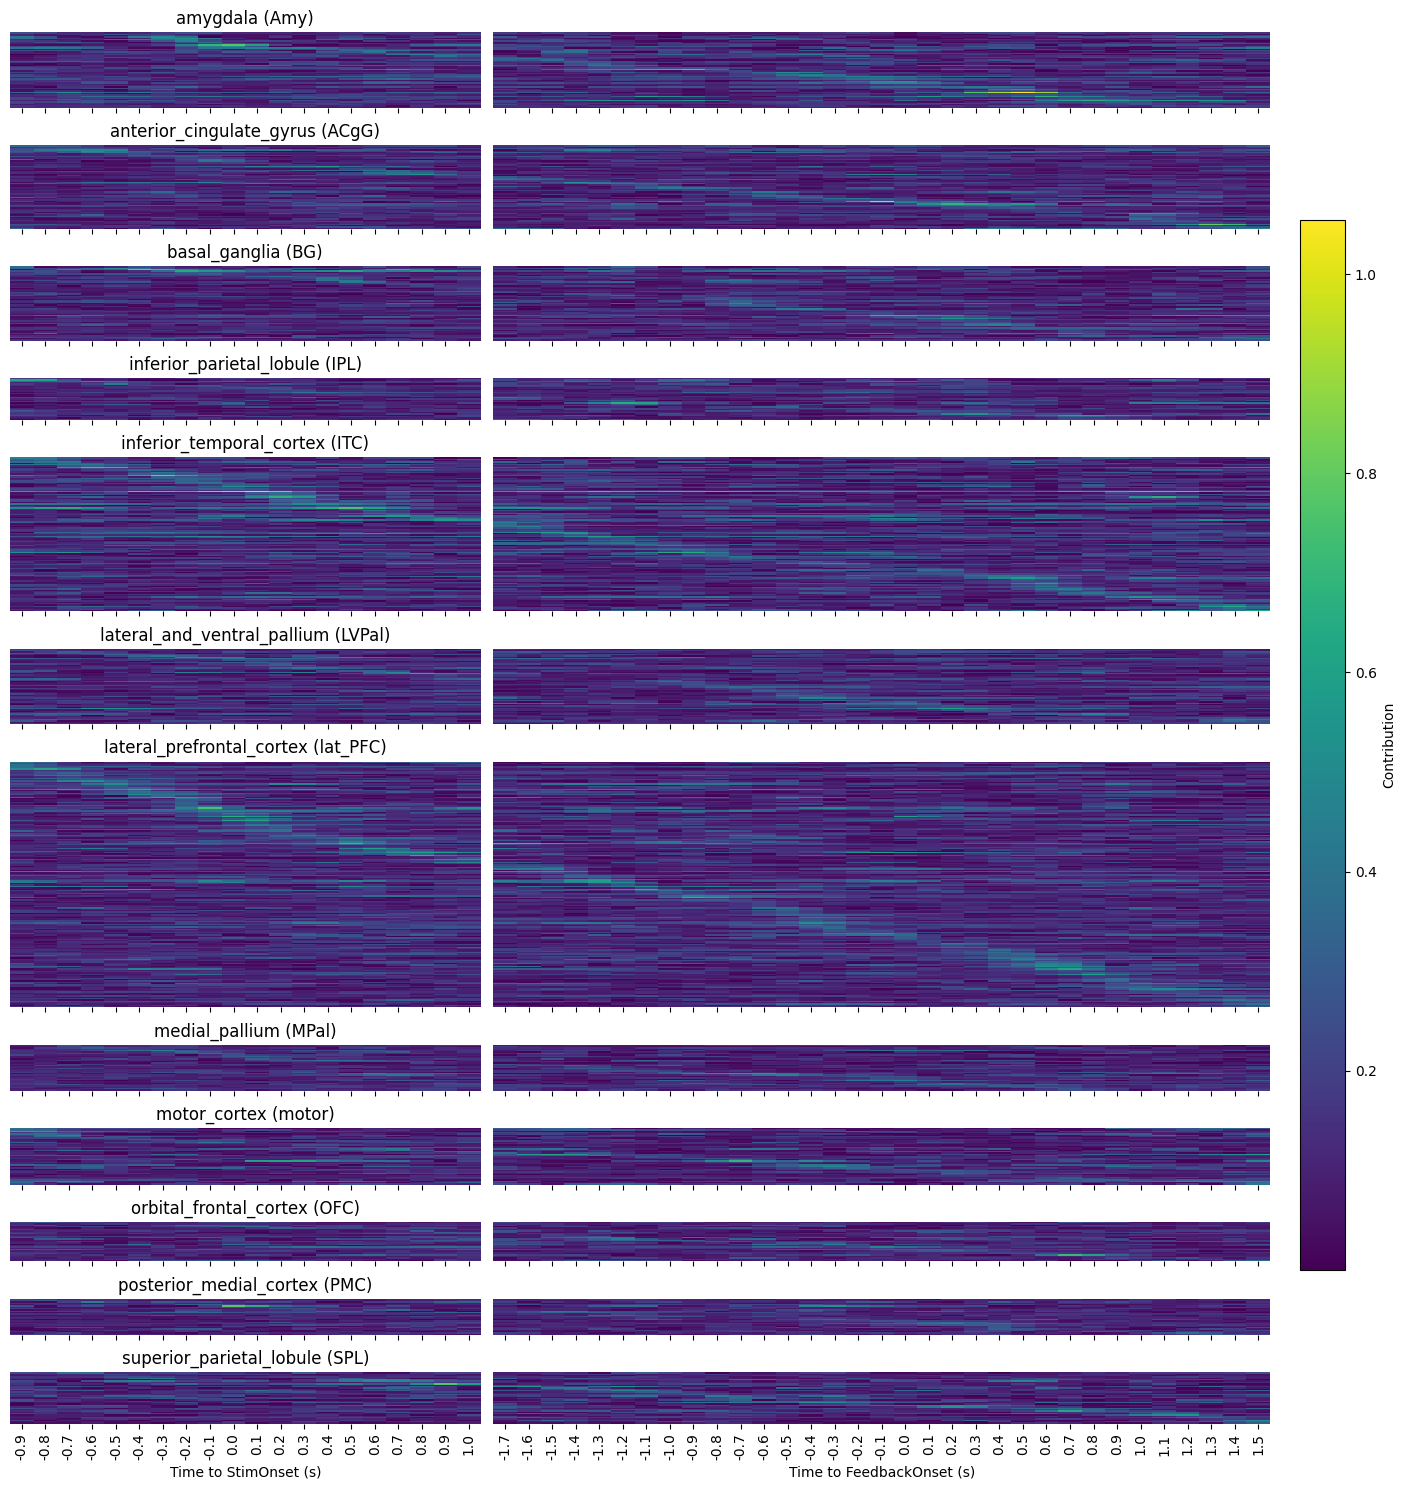

In [4]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.subject = "SA"
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "pref"
args.sig_unit_level = "belief_partition_all_time_95th"
# args.splitter = "kfold"
# args.num_splits = 2

visualization_utils.plot_combined_accs(args)
order = visualization_utils.plot_weights(args, region_level="structure_level2", run_idx=0)


{'amygdala (Amy)': 41        2018091926
 12        2018082016
 22        2018083021
 5         2018080342
 34        2018090724
 31        2018090702
 19        2018082816
 50        2018100124
 27        2018090626
 16        2018082118
 14        2018082116
 43        2018092103
 20        2018082820
 13        2018082017
 23        2018090401
 3         2018080238
 51        2018100318
 24        2018090402
 36        2018091025
 53        2018100820
 38        2018091801
 46        2018092424
 42        2018092017
 54    20180725000105
 21        2018082924
 17        2018082219
 39        2018091830
 47        2018092527
 29        2018090634
 10        2018081722
 11        2018082015
 2         2018080208
 37        2018091205
 7         2018080817
 35        2018090725
 26        2018090526
 25        2018090525
 52        2018100516
 0         2018070501
 28        2018090632
 18        2018082222
 45        2018092423
 55    20180725000135
 6         2018080630
 49        201

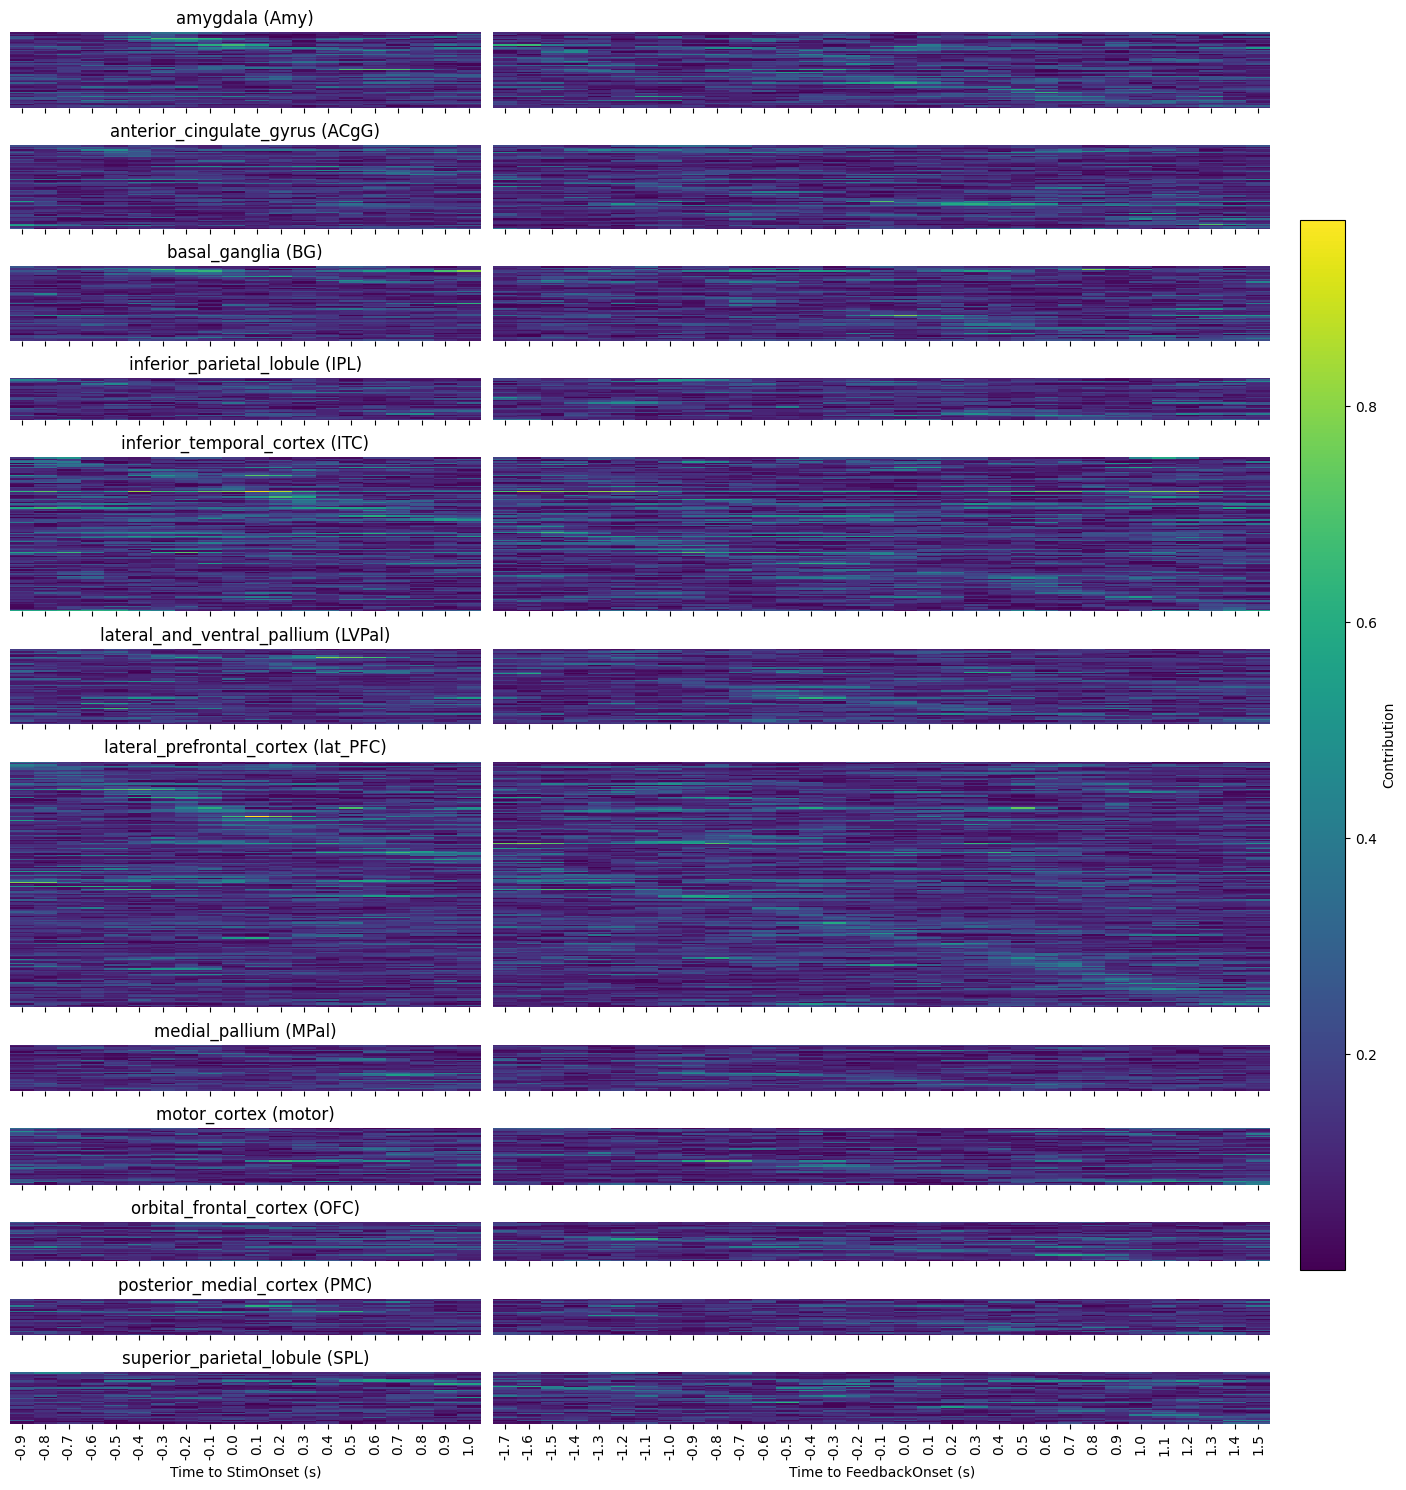

In [5]:
visualization_utils.plot_weights(args, region_level="structure_level2", unit_orders=order, run_idx=1)
